Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute
confusion matrix, accuracy, error rate, precision and recall on the given dataset.
Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

## Graphs

1. Histogram

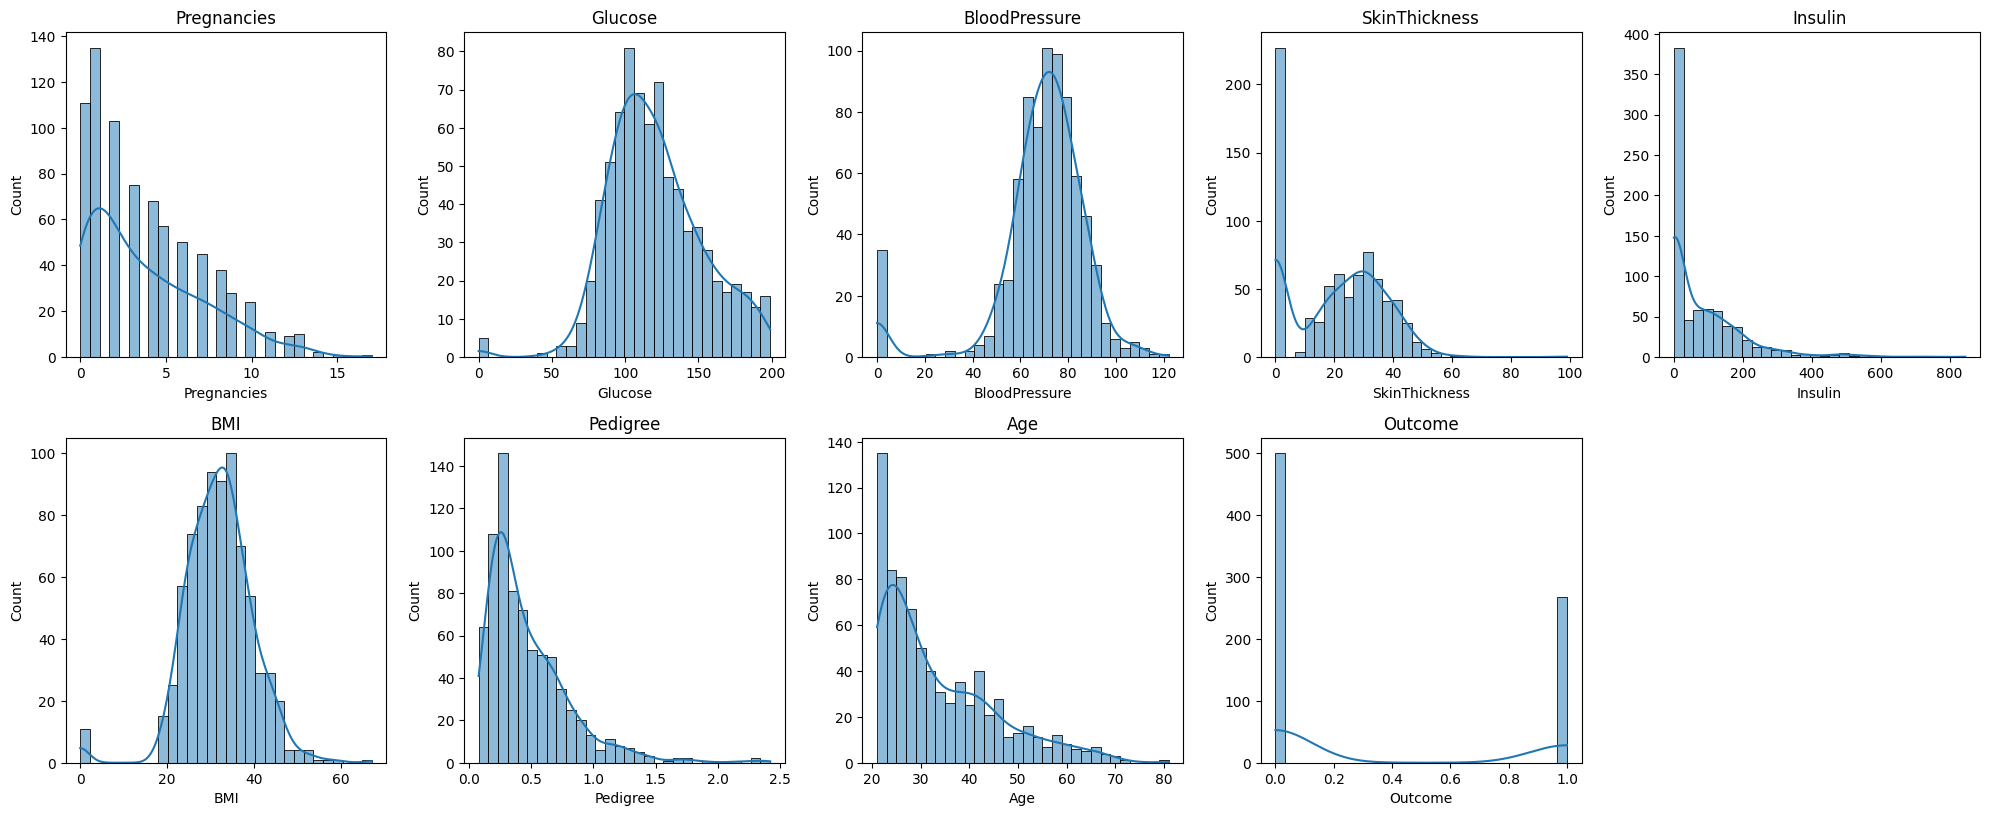

In [9]:
# df.hist(figsize=(20,20))

# or
plt.figure(figsize=(20,20))

# for i, col in enumerate(df.select_dtypes(include=['number']).columns, 1):
for i, col in enumerate(df, 1):
    plt.subplot(5, 5, i)  # adjust grid depending on number of features
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show() 


2. Correlation


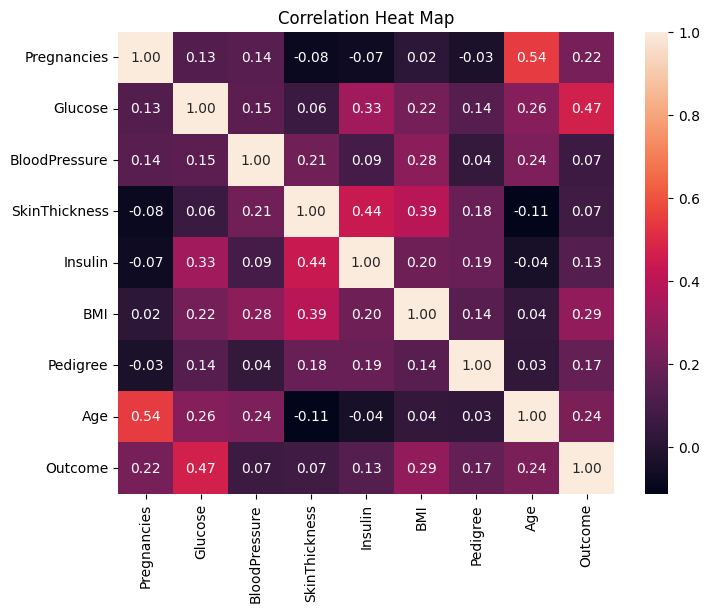

In [10]:
plt.figure(figsize=(8,6))
plt.title("Correlation Heat Map")
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

3. Boxplot

C:\TEMP\ipykernel_28380\2686459739.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df, labels=df.columns)


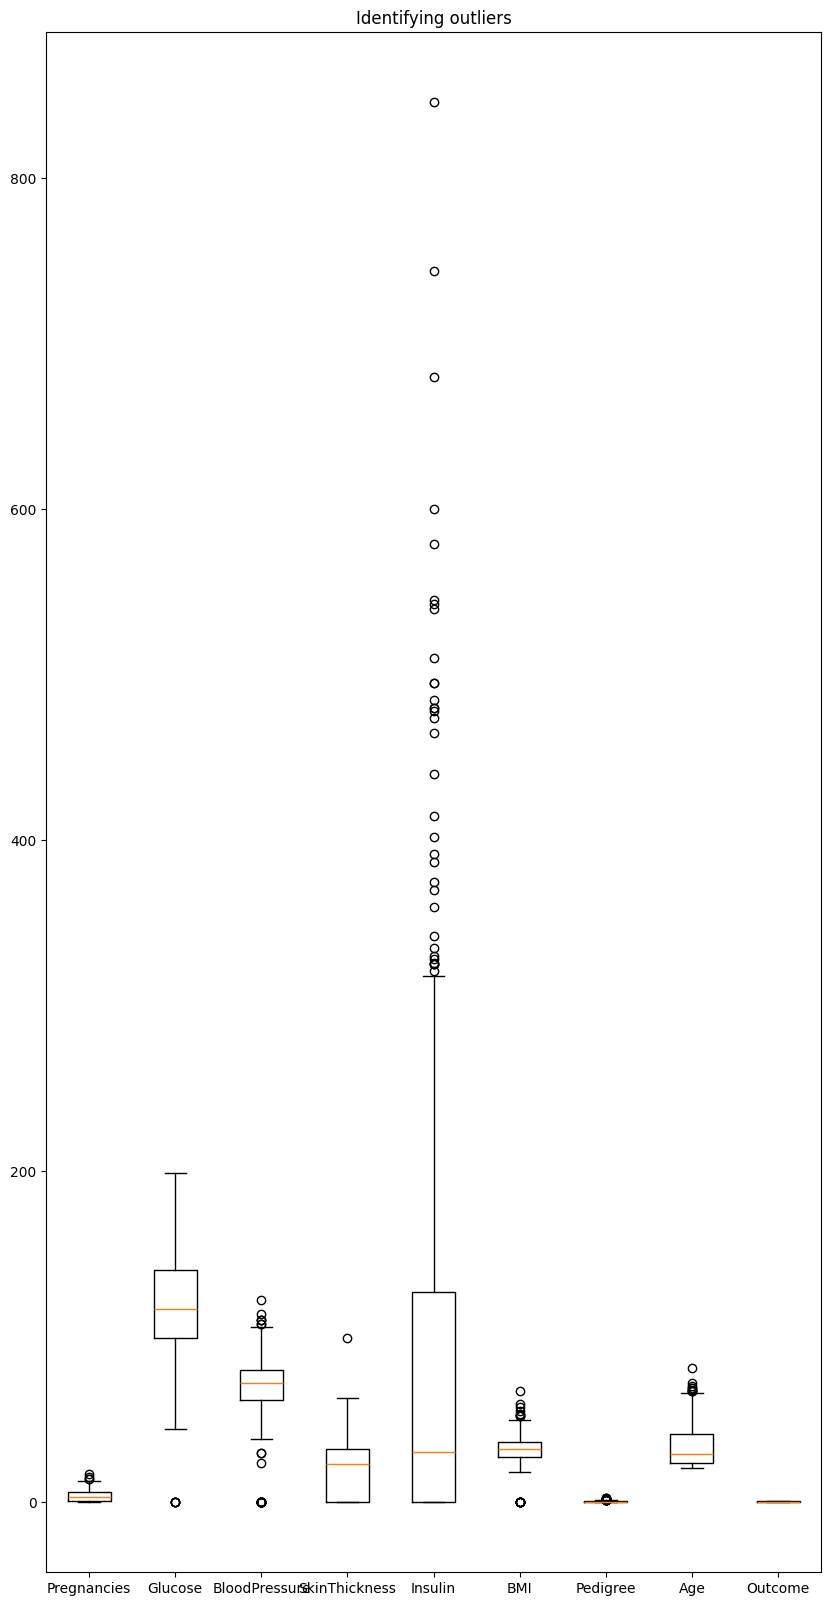

In [11]:
# df.boxplot(figsize=(10,6))

# or

plt.figure(figsize=(10,20))
plt.title("Identifying outliers")
plt.boxplot(df, labels=df.columns)
plt.show()

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

4. countplot

C:\TEMP\ipykernel_28380\1123944029.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Outcome", palette = 'Set2')


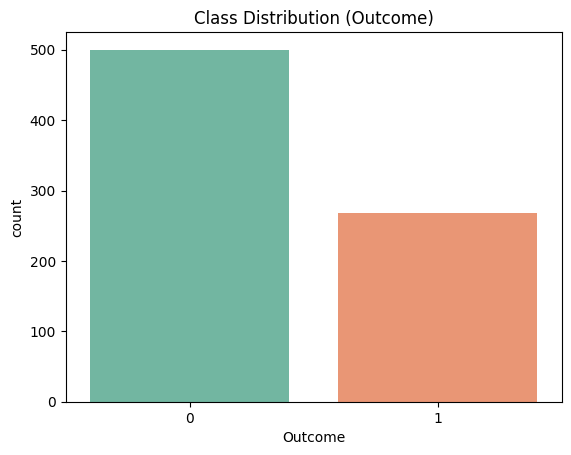

In [13]:
sns.countplot(data=df, x="Outcome", palette = 'Set2')
plt.title("Class Distribution (Outcome)")
plt.show()

# Model Training

1. X and y

In [16]:
X = df.drop('Outcome', axis =1)
y = df['Outcome']

2. Train test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

3. Standard Scaler

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scale = StandardScaler()

In [24]:
X_train = scale.fit_transform(X_train) 
X_test = scale.transform(X_test)

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


4. Train Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

5. Evaluation

In [29]:
y_pred = knn.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

Accuracy Score: 0.35714285714285715


<Axes: >

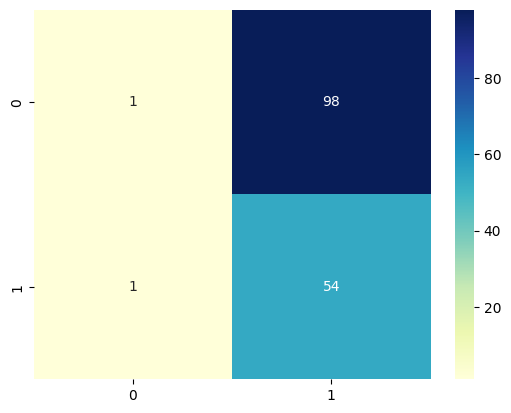

In [ ]:
print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu")

In [38]:
print(f"Error Rate: {1 - accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")

Error Rate: 0.6428571428571428
Precision: 0.35526315789473684
Recall: 0.9818181818181818
